# Estatística Teste de Hipóteses - Desafio Final

Bootcamp Data Analytics 2024

*Autor: Letícia Simões*


## Bibliotecas

In [54]:
# Bibliotecas-base
import pandas as pd

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib as plt
import seaborn as sns
from pylab import *

# Biblioteca para estatística
import scipy.stats as stat

## Proposta do desafio - Parte I:

Considerando a base de dados `experimento_test_ab.csv` responda às questões abaixo:

### Conhecendo a base de dados

In [55]:
# Carregando dados
df = pd.read_csv('experimento_test_ab.csv')

# Visualizando os dados
df.sample(5)

,Visitante_ID,Versão_Página,Visualizações,Conversões
1163,1164,B,158,0
1933,1934,B,114,0
434,435,A,124,0
639,640,A,181,0
1280,1281,B,162,0


In [56]:
# Visualizando tamanho do DataFrame
df.shape

(2000, 4)

In [57]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [58]:
# Estatísticas descritivas das variáveis numéricas
df.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


In [59]:
# Estatísticas descritivas das variáveis categóricas
df.describe(include=['object'])

,Versão_Página
count,2000
unique,2
top,A
freq,1000


In [60]:
# Valores faltantes
df.isnull().sum()

Visitante_ID     0
Versão_Página    0
Visualizações    0
Conversões       0
dtype: int64

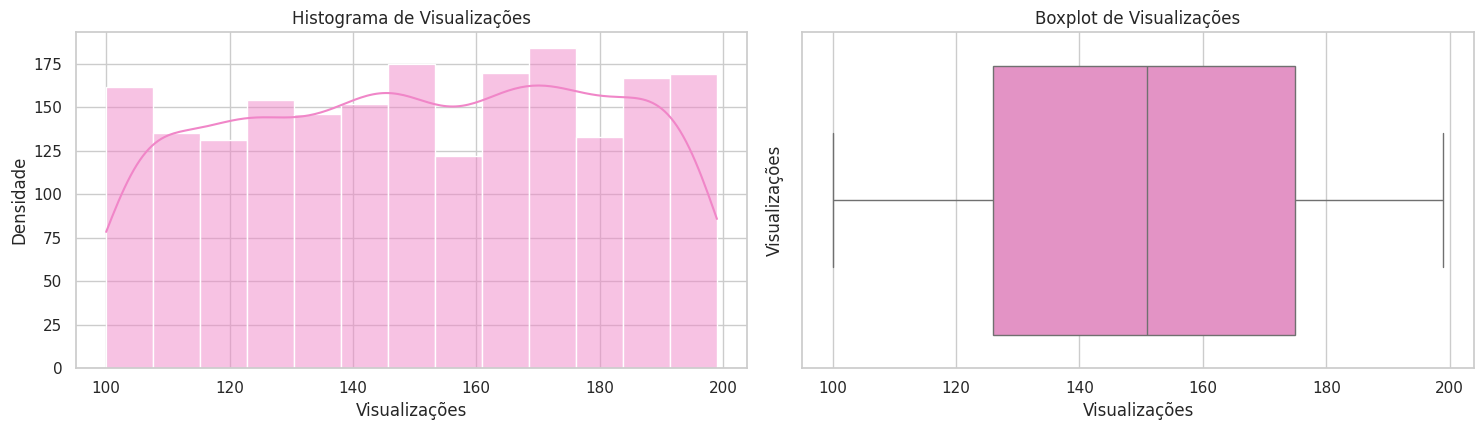

In [61]:
# Histogramas e boxplots
plt.figure(figsize=(15, 8))
sns.set_theme(style='whitegrid')

plt.subplot(2, 2, 1)
sns.histplot(df['Visualizações'], kde=True, color='#f086c8')
plt.title(f'Histograma de Visualizações')
plt.xlabel('Visualizações')
plt.ylabel('Densidade')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Visualizações', color='#f086c8')
plt.title(f'Boxplot de Visualizações')
plt.ylabel('Visualizações')

plt.tight_layout()
plt.show()

### Exercício 01.
**Qual dos cenários tem a maior taxa de conversão?**

In [62]:
# Encontra valores únicos para Versão_Página
versoes_unicas = df['Versão_Página'].unique()

# Dicionário para armazenar os resultados para cada versão da página
resultados = {}

# Inicializa valores
maior_taxa = 0
versao_pagina = ''

for versao in versoes_unicas:
    # Filtra o dataframe para cada Versão_Página
    df_versao = df[df['Versão_Página'] == versao]

    # Calcula o total de conversões e visualizações
    total_conversao    = df_versao['Conversões'].sum()
    total_visualizacao = df_versao['Visualizações'].sum()

    # Calcula a taxa de conversão
    taxa_conversao = (total_conversao / total_visualizacao) * 100

    # Armazena os resultados no dicionário
    resultados[versao] = {'Total_Conversao': total_conversao,
                          'Total_Visualizacao': total_visualizacao,
                          'Taxa_Conversao': round(taxa_conversao, 2)}

    # Valida maior Taxa de Conversão
    if (taxa_conversao > maior_taxa):
        maior_taxa    = round(taxa_conversao, 2)
        versao_pagina = versao

# Resultados
for versao, resultado in resultados.items():
    print(f"Versão {versao}")
    print(f"Total de conversões   : {resultado['Total_Conversao']}")
    print(f"Total de visualizações: {resultado['Total_Visualizacao']}")
    print(f"Taxa de conversão (%) : {resultado['Taxa_Conversao']}")
    print()

print(f"A versão de página {versao_pagina} apresentou a maior taxa de conversão, atingindo {maior_taxa}%.")

Versão A
Total de conversões   : 105
Total de visualizações: 150835
Taxa de conversão (%) : 0.07

Versão B
Total de conversões   : 125
Total de visualizações: 150676
Taxa de conversão (%) : 0.08

A versão de página B apresentou a maior taxa de conversão, atingindo 0.08%.


### Exercício 02.
**Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:**

- O cenário A, da base, como o inicial, que funciona hoje.
- Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).
- Também considere 80% de certeza de conseguir capturar o efeito da nova abordagem.
- O aumento para 10% de conversão.

In [63]:
# Cria dataframe separado para o cenário A
df_a = df[df['Versão_Página'] == 'A']

# Taxa de conversão ideal (10%)
taxa_conversao_ideal = 0.10

# Taxa de conversão atual
total_conversao      = df_a['Conversões'].sum()
total_visualizacao   = df_a['Visualizações'].sum()
taxa_conversao_atual = total_conversao / total_visualizacao

# Delta: diferença entre a taxa de conversão ideal e a atual
delta = taxa_conversao_ideal - taxa_conversao_atual

# Nível de confiança (1 - alpha)
confianca = 0.95

# Nível de significância (alpha)
alpha = 0.05

# Z-score correspondente ao nível de confiança (1 - alpha/2)
z_alpha = stat.norm.ppf(1 - alpha/2)
print(f'Valor de Zα: {z_alpha:.2f}')

# Poder estatístico (80%) (beta)
beta = 0.80

# Z-score correspondente ao poder estatístico (1 - beta)
z_beta = stat.norm.ppf(1 - (1 - beta))
print(f'Valor de Zβ: {z_beta:.2f}')

# Variância amostral para o cenário A
variancia_amostral_A = df.groupby('Versão_Página')['Conversões'].sum().var()
print(f'Valor de Variância amostral: {variancia_amostral_A}')

# Tamanho da amostra necessário
n = (2 * (variancia_amostral_A) * (z_alpha + z_beta)**2) / delta**2

# Arredondando para o próximo número inteiro
tamanho_amostra_necessario = round(n)

print("Tamanho da amostra necessário:", tamanho_amostra_necessario)

Valor de Zα: 1.96
Valor de Zβ: 0.84
Valor de Variância amostral: 200.0
Tamanho da amostra necessário: 318372


## Proposta do desafio - Parte II:

Verifique a base `pacientes.csv`, os dados são fictícios. Sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda às perguntas abaixo:

#### Conhecendo a base de dados

In [64]:
# Carregando dados
df_pacientes = pd.read_csv('pacientes.csv')

# Visualizando os dados
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [65]:
# Tratando a coluna sem nome
df_pacientes.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

# Visualizando os dados após a alteração
df_pacientes.head()

,Id,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [66]:
# Visualizando tamanho do DataFrame
df_pacientes.shape

(1000, 9)

In [67]:
# Tipos de variáveis
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [68]:
# Estatísticas descritivas das variáveis numéricas
df_pacientes.describe()

,Id,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,150.375623,49.757000,0.503000,1.526000,0.51000
std,288.819436,9.943613,11.682998,0.500241,1.104783,0.50015
min,0.000000,112.929821,30.000000,0.000000,0.000000,0.00000
25%,249.750000,144.240948,40.000000,0.000000,1.000000,0.00000
50%,499.500000,150.455624,49.000000,1.000000,2.000000,1.00000
75%,749.250000,156.792113,60.000000,1.000000,3.000000,1.00000
max,999.000000,181.803131,70.000000,1.000000,3.000000,1.00000


In [69]:
# Estatísticas descritivas das variáveis categóricas
df_pacientes.describe(include=['object'])

,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
count,1000,1000,1000
unique,2,4,2
top,Feminino,Afro-americano,Com condições de saúde adicionais
freq,503,260,510


In [70]:
# Verifica valores únicos das variáveis categóricas
for column in df_pacientes.select_dtypes(include=['object']).columns:
  unique_values = df_pacientes[column].unique()
  print(f"Valores únicos da coluna {column}: {unique_values}")

Valores únicos da coluna Nome_Genero: ['Feminino' 'Masculino']
Valores únicos da coluna Nome_Etnia: ['Afro-americano' 'Asiático' 'Hispânico' 'Caucasiano']
Valores únicos da coluna Nome_Estado_Saude: ['Com condições de saúde adicionais' 'Saudável']


In [71]:
# Valores faltantes
df_pacientes.isnull().sum()

Id                   0
Pressao_Arterial     0
Idade                0
Genero               0
Etnia                0
Estado_Saude         0
Nome_Genero          0
Nome_Etnia           0
Nome_Estado_Saude    0
dtype: int64

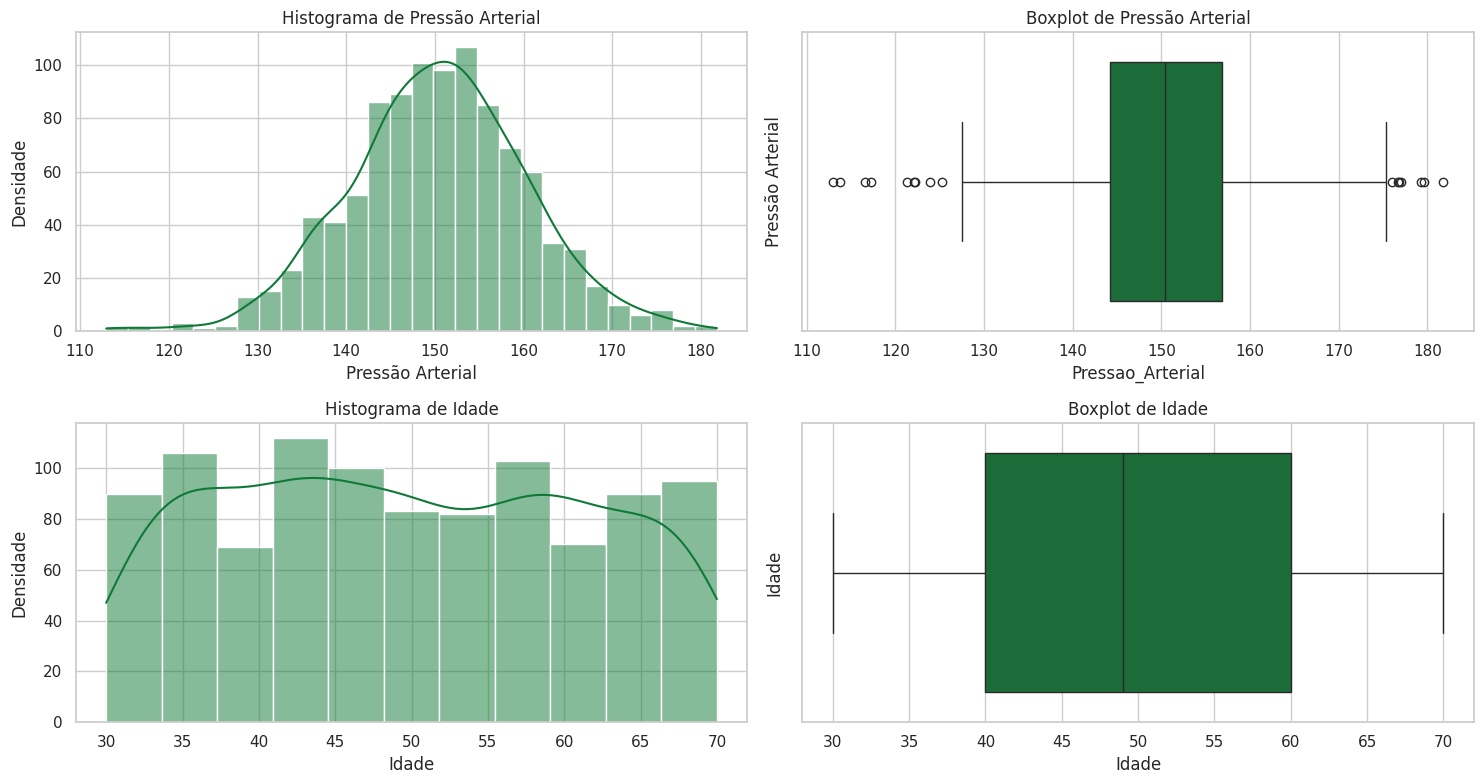

In [72]:
# Histogramas e boxplots
categorias = {'Pressao_Arterial': 'Pressão Arterial',
              'Idade': 'Idade'}

plt.figure(figsize=(15, 8))
sns.set_theme(style='whitegrid')

for i, (coluna, nome) in enumerate(categorias.items(), 1):
  # Histograma
  plt.subplot(2, 2, 2*i-1)
  sns.histplot(df_pacientes[coluna], kde=True, color='#0f7937')
  plt.title(f'Histograma de {nome}')
  plt.xlabel(nome)
  plt.ylabel('Densidade')

  # Boxplot
  plt.subplot(2, 2, 2*i)
  sns.boxplot(data=df_pacientes, x=coluna, color='#0f7937')
  plt.title(f'Boxplot de {nome}')
  plt.ylabel(nome)

plt.tight_layout()
plt.show()

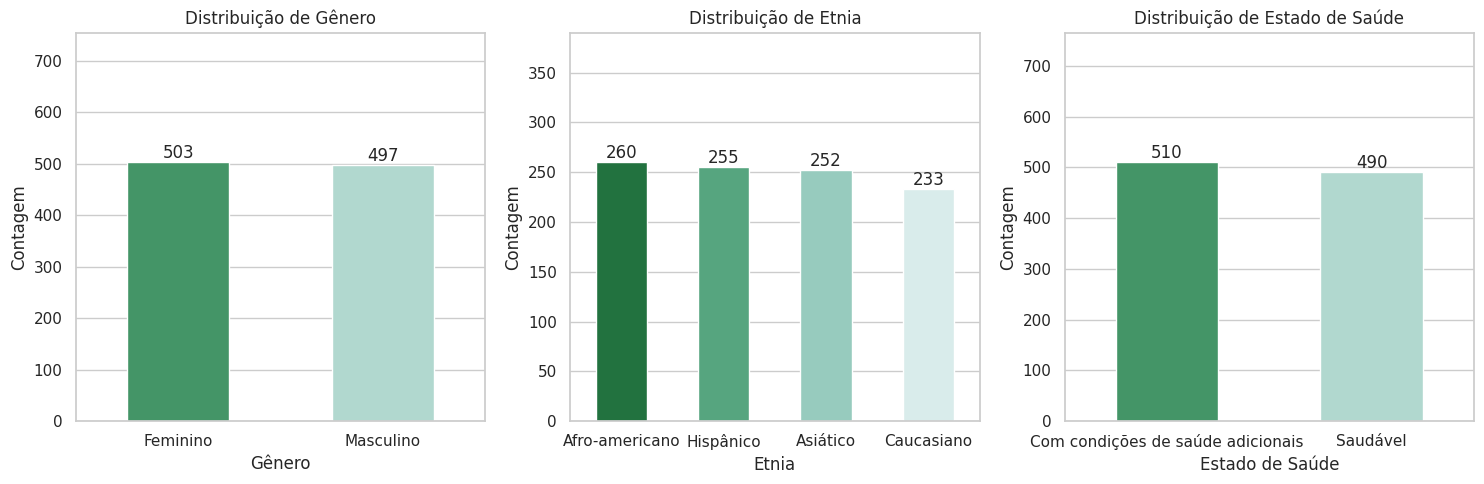

In [73]:
# Gráficos de Barras
categorias = {'Nome_Genero': 'Gênero',
              'Nome_Etnia': 'Etnia',
              'Nome_Estado_Saude': 'Estado de Saúde'}

sns.set_theme(style='whitegrid')
plt.figure(figsize=(15, 5))

for i, coluna in enumerate(categorias.items(), 1):
  plt.subplot(1, 3, i)
  sns.barplot(x=df_pacientes[coluna[0]].value_counts().index,
              y=df_pacientes[coluna[0]].value_counts(),
              hue=df_pacientes[coluna[0]].value_counts().index,
              width=0.5,
              palette="BuGn_r")
  # Título
  plt.title(f'Distribuição de {coluna[1]}')
  plt.xlabel(coluna[1])
  plt.ylabel('Contagem')
  plt.ylim(0, df_pacientes[coluna[0]].value_counts().max() * 1.5)

  # Valores em cima das barras
  for index, value in enumerate(df_pacientes[coluna[0]].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Exercício 03.
**Considerando uma amostra de 45 números que representam o index do dataframe, `índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362])`. Considerando essa amostra, é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.**

In [74]:
# Índices da amostra
indices = [909, 751, 402, 400, 726,  39, 184, 269, 255, 769, 209, 715, 677, 381,
           793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,
            89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505,
           273, 957, 362]

# Selecionando a amostra do dataframe
df_amostra = df_pacientes.loc[indices].sort_index()

# Filtrando pela coluna Idade
amostra_idade = df_amostra['Idade']

# Aplicando teste t-Student
teste_t, p_valor = stat.ttest_1samp(amostra_idade, 50)

# Definindo o nível de significância (alpha)
alpha = 0.05

# Comparando o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
               "Podemos concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
               "Não há evidências suficientes para concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}")

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que a média de idade das pessoas com problemas cardíacos é superior a 50 anos.

p-valor: 0.96


### Exercício 04.
**Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?**

**Conclusão:**

Após analisar os dados, constatei que as duas amostras, uma representando pessoas com *condições de saúde adicionais* e outra representando pessoas *saudáveis*, **são independentes**.

Isso implica que cada linha no conjunto de dados retrata um indivíduo distinto, e não há uma relação específica entre as observações de uma amostra e as da outra. Em outras palavras, as observações das amostras foram selecionadas de forma independente e elas não exercem influência uma sobre a outra.

### Exercício 05.
**Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, `índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372])`, podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.**

In [75]:
# Índices da amostra
indices = [690, 894, 67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174,
           105, 693,  6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Seleciona a amostra do dataframe
df_amostra = df_pacientes.loc[indices].sort_index()

# Filtra pela coluna Estado_Saude
amostra_condicao_0 = df_amostra[df_amostra['Estado_Saude'] == 0]
amostra_condicao_1 = df_amostra[df_amostra['Estado_Saude'] == 1]

# Calcula média da pressão arterial
media_pressao_0 = amostra_condicao_0['Pressao_Arterial'].mean()
media_pressao_1 = amostra_condicao_1['Pressao_Arterial'].mean()

# Aplica teste t para duas amostras independentes
teste_t, p_valor = stat.ttest_ind(amostra_condicao_1['Pressao_Arterial'],
                                  amostra_condicao_0['Pressao_Arterial'])

# Nível de significância (alpha)
alpha = 0.06

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que há diferença significativa entre a média de pressão arterial para pacientes com condições de saúde adicionais e pacientes saudáveis.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que há diferença significativa entre a média de pressão arterial para pacientes com condições de saúde adicionais e pacientes saudáveis.\n")

# Resultados
print(f"Média de pressão arterial para pacientes com condições de saúde adicionais: {round(media_pressao_1, 2)}")
print(f"Média de pressão arterial para pacientes sem condições de saúde adicionais: {round(media_pressao_0, 2)}")
print(f"\nConclusão: {conclusao}\np-valor: {round(p_valor, 2)}")

Média de pressão arterial para pacientes com condições de saúde adicionais: 153.2
Média de pressão arterial para pacientes sem condições de saúde adicionais: 152.94

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que há diferença significativa entre a média de pressão arterial para pacientes com condições de saúde adicionais e pacientes saudáveis.

p-valor: 0.94


### Exercício 06.
**Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? _(Teste ANOVA, alpha é 5%)_.**

#### A. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

In [76]:
# Valores únicos para coluna Etnia
valores_unicos = df_pacientes['Nome_Etnia'].unique()

# Dividindo o conjunto de dados em diferentes grupos étnicos
grupos_etnicos = [df_pacientes[df_pacientes['Nome_Etnia'] == etnia]['Pressao_Arterial'] for etnia in valores_unicos]

# Calculando médias dos grupos étnicos
medias_por_grupo_etnico = {nome_etnia: grupo.mean() for nome_etnia, grupo in zip(valores_unicos, grupos_etnicos)}

# Aplicando teste ANOVA
teste_anova, p_valor = stat.f_oneway(*grupos_etnicos)

# Nível de significância (alpha)
alpha = 0.05

# Comparando o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
               "Podemos concluir que existe uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos desta população.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
               "Não há evidências suficientes para concluir que exista uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.\n")

# Resultados
print("Pressão arterial média por grupo étnico:")
for nome_etnia, media in medias_por_grupo_etnico.items():
  print(f"- {nome_etnia.capitalize()}: {round(media, 2)}")

print(f"\nConclusão: {conclusao}\np-valor: {round(p_valor, 2)}")

Pressão arterial média por grupo étnico:
- Afro-americano: 150.73
- Asiático: 150.33
- Hispânico: 150.42
- Caucasiano: 149.98

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que exista uma diferença significativa na pressão arterial média entre os grupos étnicos nesta população.

p-valor: 0.87


#### B. Existe uma associação entre a idade dos pacientes e sua pressão arterial?

##### I. Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.

##### II. Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.

In [77]:
# Separa os dados do dataframe pelas colunas Idade e Pressao_Arterial
df_idade            = df_pacientes['Idade']
df_pressao_arterial = df_pacientes['Pressao_Arterial']

# Tabela de contingência
tabela_contingencia = pd.crosstab(df_idade, df_pressao_arterial)

# Aplica teste qui-quadrado
chi2, p_valor, _, _ = stat.chi2_contingency(tabela_contingencia)

# Nível de significância (alpha)
alpha = 0.05

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que a idade dos pacientes está associada à sua pressão arterial.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que a idade dos pacientes está associada à sua pressão arterial.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}\nQui-quadrado: {chi2}")

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que a idade dos pacientes está associada à sua pressão arterial.

p-valor: 0.44
Qui-quadrado: 40000.0


#### C. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

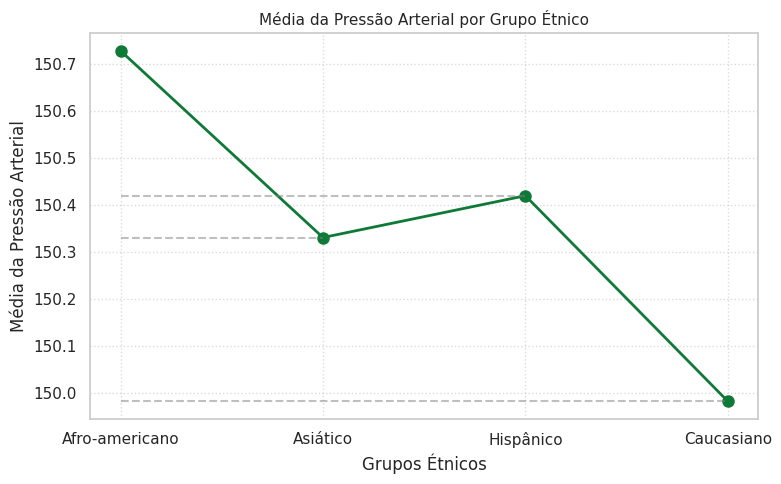

In [78]:
nomes_etnias = list(medias_por_grupo_etnico.keys())
medias_pressao_arterial = list(medias_por_grupo_etnico.values())

# Plotar o gráfico
plt.figure(figsize=(8, 5))
plt.plot(nomes_etnias, medias_pressao_arterial, color='#0f7937', marker='o', markersize=8, linestyle='-', linewidth=2)

for nome_etnia, media in zip(nomes_etnias, medias_pressao_arterial):
  plt.hlines(media, xmin=0, xmax=nome_etnia, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Grupos Étnicos')
plt.ylabel('Média da Pressão Arterial')
plt.title('Média da Pressão Arterial por Grupo Étnico', fontsize=11)
plt.grid(linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

**Conclusão:**

Conforme análise realizada no exercício (A) concluí que não há evidências suficientes para afirmar que existe uma diferença significativa na pressão arterial média entre os grupos étnicos desta população.

### Exercício 07.
**Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. _(Teste qui-quadrado)_**

In [79]:
# Separa os dados do dataframe pelas colunas Genero e Estado_Saude
df_genero       = df_pacientes['Genero']
df_estado_saude = df_pacientes['Estado_Saude']

# Tabela de contingência
tabela_contingencia = pd.crosstab(df_genero, df_estado_saude)

# Aplica teste qui-quadrado
chi2, p_valor, _, _ = stat.chi2_contingency(tabela_contingencia)

# Nível de significância (alpha)
alpha = 0.05

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}\nQui-quadrado: {chi2}")

Conclusão: Não rejeitamos a hipótese nula.
Não há evidências suficientes para concluir que existe uma relação significativa entre o gênero e as condições de saúde desta população.

p-valor: 1.0
Qui-quadrado: 0.0


### Exercício 08.
**Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? _(nível de confiança 95%)_**

In [80]:
# Seleciona amostra do Dataframe - Filtra pela coluna Estado_Saude
amostra_condicao_1 = df_pacientes[df_pacientes['Estado_Saude'] == 1]

# Calcula a média e o desvio padrão da pressão arterial
media_pressao_condicoes = amostra_condicao_1['Pressao_Arterial'].mean()
desvio_padrao_condicoes = amostra_condicao_1['Pressao_Arterial'].std()

# Calcula o tamanho da amostra
tamanho_amostra = amostra_condicao_1.shape[0]

# Nível de confiança (95%)
confianca = 0.95

# Nível de significância (alpha)
alpha = 0.05

# Encontra o valor de Z para o nível de confiança
Z = stat.norm.ppf((1 + confianca) / 2)

# Calcula o intervalo de confiança
intervalo_confiancaA = Z * (desvio_padrao_condicoes / (tamanho_amostra ** alpha))
intervalo_confianca = Z * (desvio_padrao_condicoes / np.sqrt(tamanho_amostra))

# Calcula os limites inferior e superior do intervalo de confiança
limite_inferior = media_pressao_condicoes - intervalo_confianca
limite_superior = media_pressao_condicoes + intervalo_confianca

# Resultados
print(f"Intervalo de Confiança: {round(intervalo_confianca, 2)}")
print(f"Limite Inferior: {round(limite_inferior, 2)}")
print(f"Limite Superior: {round(limite_superior, 2)}")

Intervalo de Confiança: 0.9
Limite Inferior: 149.22
Limite Superior: 151.02


### Exercício 09.
**A distribuição da pressão arterial na população segue uma distribuição normal?**

- A. Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
- B. Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

In [81]:
# Aplicando teste KS
teste_ks, p_valor = stat.kstest(df_pacientes['Pressao_Arterial'], 'norm')

# Nível de significância
alpha = 0.05

# Compara o p-valor com alpha
if p_valor < alpha:
  conclusao = ("Rejeitamos a hipótese nula.\n" +
	             "Podemos concluir que a distribuição da pressão arterial na população segue uma distribuição normal.\n")
else:
  conclusao = ("Não rejeitamos a hipótese nula.\n" +
	             "Não há evidências suficientes para concluir que a distribuição da pressão arterial na população NÃO segue uma distribuição normal.\n")

# Resultados
print(f"Conclusão: {conclusao}\np-valor: {round(p_valor, 2)}")

Conclusão: Rejeitamos a hipótese nula.
Podemos concluir que a distribuição da pressão arterial na população segue uma distribuição normal.

p-valor: 0.0


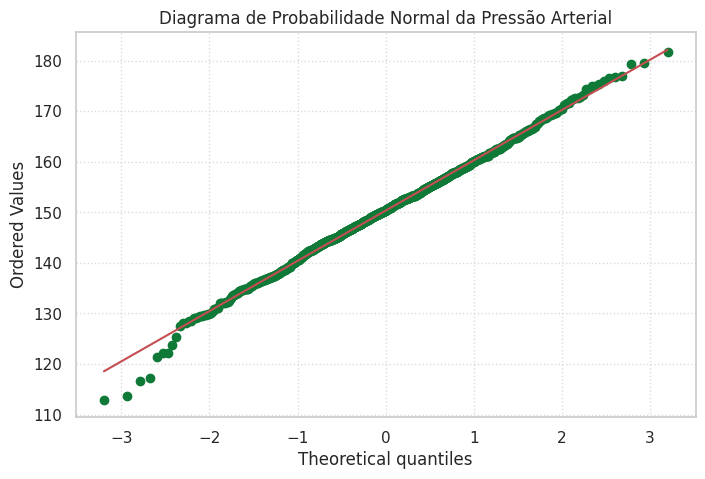

In [82]:
# Plotar o gráfico
plt.figure(figsize=(8, 5))
stats.probplot(df_pacientes['Pressao_Arterial'], dist="norm", plot=plt)
plt.title('Diagrama de Probabilidade Normal da Pressão Arterial')
plt.grid(linestyle=':', alpha=0.7)
plt.gca().get_lines()[0].set_color('#0f7937')
plt.show()

**Conclusão:**

Embora haja caudas fortes à esquerda que causam um leve desvio, a distribuição pode ser considerada normal devido ao formato de sino e à concentração na linha vermelha do gráfico.